In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)

In [2]:
%cd ~/cdv/

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [37]:
dataset = 'mp2022'

import json
with open(f'precomputed/{dataset}/raw_metadata.json', 'r') as f:
    metadata = json.load(f)
    
df = pd.read_feather(f'precomputed/{dataset}/energy_data.feather')
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,energy,total_energy
0,0.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.304165,-1230.566253
1,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.064923,-65.038769
2,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.795275,-53.133846
3,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.920932,-47.051190
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.640220,-51.042420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,48.0,6.0,0.0,0.0,0.0,-7.077639,-566.211133
154714,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,-5.462179,-327.730751
154715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,-6.329547,-259.511434
154716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,-4.575419,-164.715067


In [38]:
from pymatgen.core import Element

symbols = [Element.from_Z(z).symbol for z in metadata['atomic_numbers'][1:]]

df.columns = ['0', *symbols, 'energy', 'total_energy']
df

,0,Si,Ca,As,Sb,Cu,Se,Tm,Sn,Ac,...,W,Ne,C,O,V,He,Kr,Xe,energy,total_energy
0,0.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.304165,-1230.566253
1,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.064923,-65.038769
2,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.795275,-53.133846
3,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.920932,-47.051190
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.640220,-51.042420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,48.0,6.0,0.0,0.0,0.0,-7.077639,-566.211133
154714,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,-5.462179,-327.730751
154715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,-6.329547,-259.511434
154716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,-4.575419,-164.715067


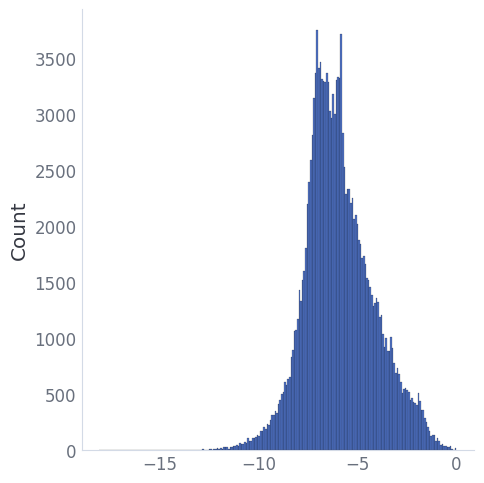

In [39]:
num_atoms = df.iloc[:, :-2].sum(axis=1)
y = df['energy'].values

X = df.iloc[:, :-2]

sns.displot(y)

In [51]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras
from keras import layers
from keras import ops

import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

y_global = y
global_shift = np.median(y_global)
global_scale = np.mean(np.abs(y_global - global_shift))
print(global_shift, global_scale)
print(tfd.Laplace(global_shift, global_scale).log_prob(y_global).mean())

# global_shift = 0
# global_scale = 1
transform = ops.softplus
inv_transform = lambda x: ops.log(ops.expm1(x))

intercept = inv_transform(1)
# transform = ops.exp
# inv_transform = ops.log


class SpeciesEnergyModel(keras.Model):
    """Models mean and MAE of each element's energy."""
    def __init__(self):
        super().__init__()
        self.shift = layers.Dense(1, kernel_initializer='zeros', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.scale = layers.Dense(1, kernel_initializer='ones', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.global_shift = self.add_weight((1,), lambda shape, dtype: global_shift * keras.initializers.Ones()(shape, dtype), trainable=True)
        self.global_scale = self.add_weight((1,), lambda shape, dtype: inv_transform(global_scale) * keras.initializers.Ones()(shape, dtype), trainable=True)

        self.built = True

    def predict_dist(self, X):
        num_atoms = ops.sum(X, axis=-1, keepdims=False)
        shift = self.shift(X).reshape(-1) / num_atoms
        scale = transform(self.scale(X).reshape(-1)) / num_atoms
        # scale = 1
        return tfd.Laplace(shift + self.global_shift, scale * transform(self.global_scale))

    def call(self, Xy):
        X, y = Xy
        dist = self.predict_dist(X)
        return -dist.log_prob(y.reshape(-1))
    

mod = SpeciesEnergyModel()

out = mod([X[:64], y[:64]])
print(out.shape, out.reshape(-1).round(5))

-6.091646344416667 1.3551746313276447
-1.9970775
(64,) [1.57817   2.49262   2.6915998 2.59887   2.0681    3.8188999 3.1371698
 3.50035   3.0428998 4.11026   4.5451097 3.74211   3.13177   2.71625
 1.7163199 1.06221   4.67976   1.1084399 3.2219398 2.4301898 2.4011
 3.9884    1.4       4.7252097 1.72784   2.30742   2.4765599 5.70679
 2.90338   2.46976   1.64867   1.23794   1.46358   4.10207   2.76616
 1.5838    3.22067   2.80743   2.44764   1.17266   4.50143   2.7093399
 4.01854   2.23178   2.0465999 2.14444   4.1581    1.66361   1.2249199
 1.83267   4.5608797 3.98333   3.5686898 1.12797   3.00958   2.50546
 2.4749398 4.2125697 2.0637999 3.54704   1.80503   1.37632   2.33779
 4.04877  ]


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/minicon

Epoch 1/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5217 - val_loss: 0.8860
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9028 - val_loss: 0.9234
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8889 - val_loss: 0.8963
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8808 - val_loss: 0.8948
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8771 - val_loss: 0.8921


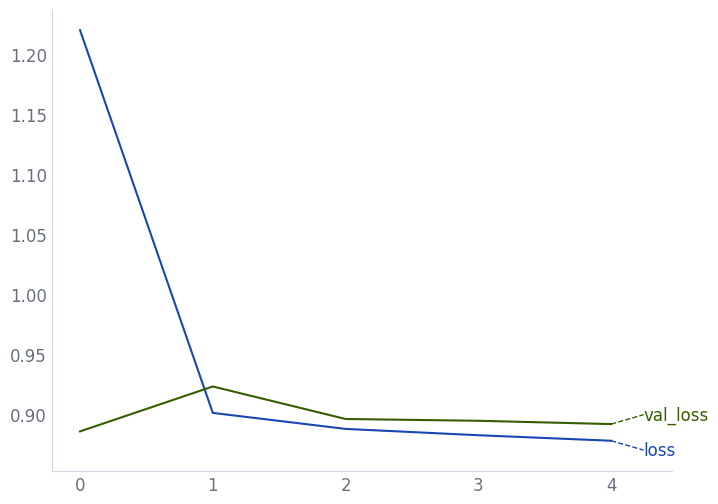

In [52]:
from keras.optimizers.schedules import PolynomialDecay

def fit(epochs=5, valid_split=0.2, batch_size=512):
    mod = SpeciesEnergyModel()
    mod([X[:64], y[:64]])

    steps_in_epoch = round((X.shape[0] * (1 - valid_split)) / (batch_size) + 0.5)

    decay_steps = steps_in_epoch * epochs

    def log_prob_loss(y_true, y_pred):
        return y_pred

    mod.compile(optimizer=keras.optimizers.Adam(
        learning_rate=PolynomialDecay(3e-2, decay_steps, end_learning_rate=1e-6), 
        global_clipnorm=3.0), loss=log_prob_loss)

    history = mod.fit([X, y], y * 0, batch_size=batch_size, epochs=epochs, validation_split=valid_split)

    pd.DataFrame(history.history).plot()
    rp.line_labels()
    
    return mod

mod = fit()

Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3950
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.8943
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.8794
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.8734
Epoch 5/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.8652


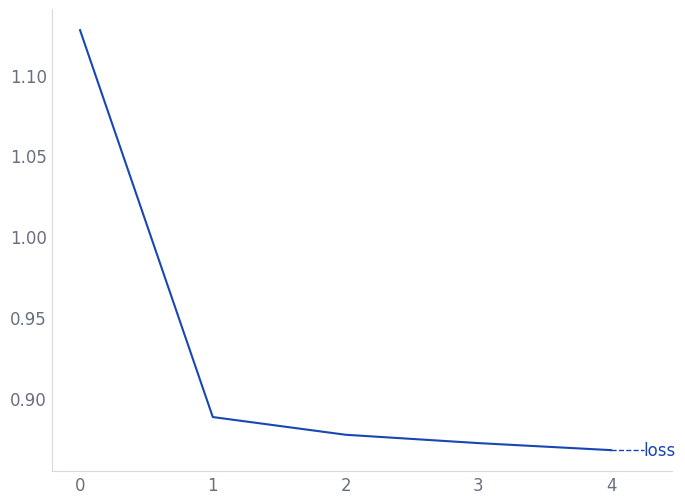

In [53]:
mod = fit(valid_split=0)

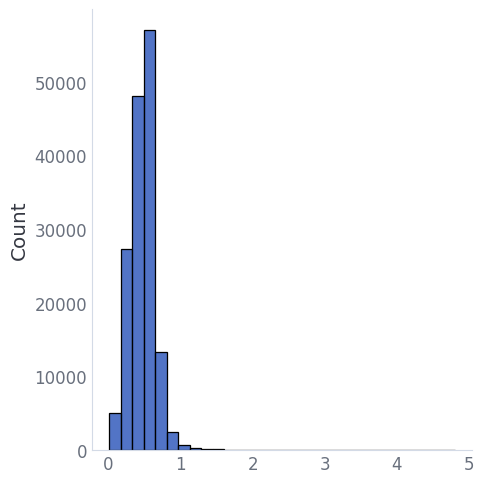

In [54]:
sns.displot(mod.predict_dist(X).scale, bins=30)

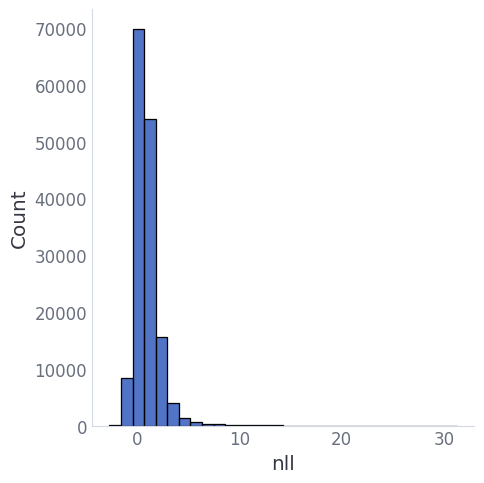

In [55]:
dists = mod.predict_dist(X)
df['loc'] = dists.loc
df['scale'] = dists.scale
df['resid'] = dists.loc-y
df['nll'] = -dists.log_prob(y.reshape(-1))

sns.displot(df['nll'], bins=30)
# xx = jnp.linspace(-10, 10, 1000)
# plt.plot(xx, jnp.exp(-jnp.abs(xx)))

In [57]:
worst = df.sort_values('resid').tail(10)
worst.loc[:, (worst != 0).any(axis=0)]

,Ba,Bi,Gd,Cr,Fe,U,O,Xe,energy,total_energy,loc,scale,resid,nll
106341,1.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,-10.696461,-106.964608,-8.205477,0.579131,2.490984,4.448165
36279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.030166,-0.030166,3.614031,4.801969,3.644198,3.021070
36258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.030393,-0.030393,3.614031,4.801969,3.644425,3.021117
36440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.031724,-0.126897,3.614031,4.775852,3.645756,3.020092
38521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.034033,-0.102099,3.614031,4.775856,3.648064,3.020576
36321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034237,-0.034237,3.614031,4.801969,3.648268,3.021917
36620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.034680,-0.138719,3.614031,4.775852,3.648711,3.020711
35922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.036016,-0.072033,3.614031,4.776133,3.650048,3.021005
36300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.036174,-0.036174,3.614031,4.801969,3.650205,3.022321
80207,0.0,2.0,0.0,0.0,0.0,8.0,19.0,0.0,-18.038444,-523.114885,-8.463398,0.593221,9.575047,16.311729


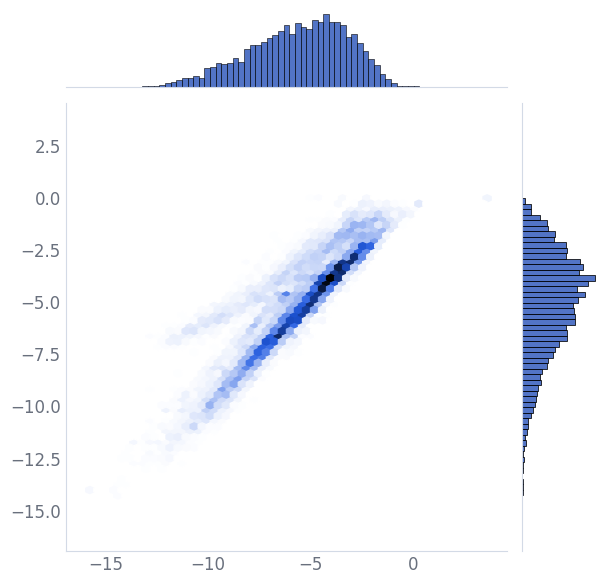

In [58]:
def show_error(mask):
    g = sns.jointplot(x=mod.predict_dist(X[mask]).loc.reshape(-1), y=y[mask], kind='hex')
    lo1, hi1 = g.ax_joint.get_xlim()
    lo2, hi2 = g.ax_joint.get_ylim()
    lim = (min(lo1, lo2), max(hi1, hi2))
    g.ax_joint.set_xlim(*lim)
    g.ax_joint.set_ylim(*lim)

show_error(num_atoms <= 4)

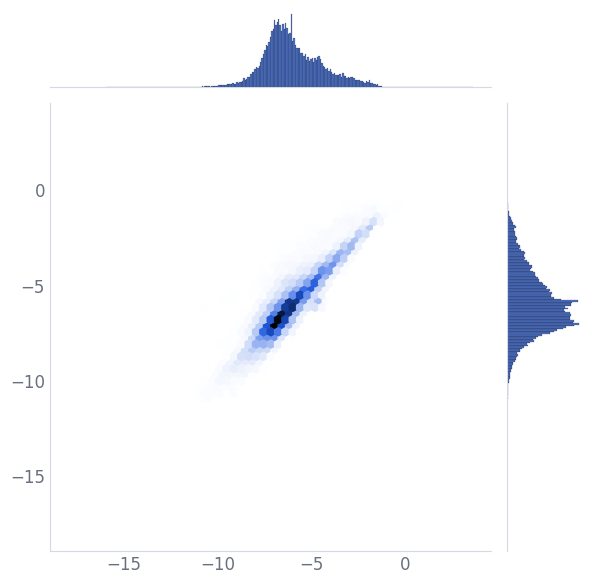

In [59]:
show_error(num_atoms >= 4)

In [60]:
data = {
    'scale': mod.scale.get_weights()[0].reshape(-1),
    'shift': mod.shift.get_weights()[0].reshape(-1),
    'global_scale': mod.global_scale.value,
    'global_shift': mod.global_shift.value,
}

@np.vectorize
def get_z(s):
    return Element(s).Z if s != '0' else 1000

atomic_scale = pd.Series(transform(data['scale'] + intercept).tolist(), index=df.columns[:len(data['scale'])])
atomic_scale.sort_values()

In    0.970902
Pb    0.980610
Sn    0.998583
0     1.000000
H     1.006589
        ...   
Be    1.949608
He    2.252921
Tc    2.775928
Kr    3.500623
Xe    4.403735
Length: 90, dtype: float64

In [61]:
atomic_energies = pd.Series((data['shift'] + data['global_shift']).tolist(), index=atomic_scale.index).sort_index(key=get_z).iloc[:-1]
atomic_energies

H     -3.559942
He    -3.322379
Li    -2.609545
Be    -3.878643
B     -7.238421
        ...    
Th    -8.900029
Pa   -10.190350
U    -12.204250
Np   -12.892574
Pu   -14.486570
Length: 89, dtype: float64

In [62]:
import json
with open('data/sevennet_stats.json', 'r') as f:
    sevenstats = json.load(f)

energy_comp = pd.DataFrame({'new': atomic_energies.values.round(3), 
                            'scale': atomic_scale.sort_index(key=get_z).iloc[:-1].values.round(3), 
                            'seven': sevenstats['atomic_energies']}, index=atomic_energies.index)

energy_comp['abs_diff'] = energy_comp.eval('abs(new - seven)')
energy_comp.sort_values('abs_diff', ascending=False)

,new,scale,seven,abs_diff
Kr,-2.360,3.501,6.767,9.127
Xe,3.614,4.404,9.847,6.233
Ne,-5.073,1.594,0.000,5.073
Ar,-4.682,1.890,-0.063,4.619
W,-12.227,1.191,-9.355,2.872
...,...,...,...,...
H,-3.560,1.007,-3.667,0.107
In,-2.712,0.971,-2.789,0.077
Sc,-7.826,1.779,-7.886,0.060
Hg,0.242,1.149,0.249,0.007


<Axes: xlabel='new', ylabel='seven'>

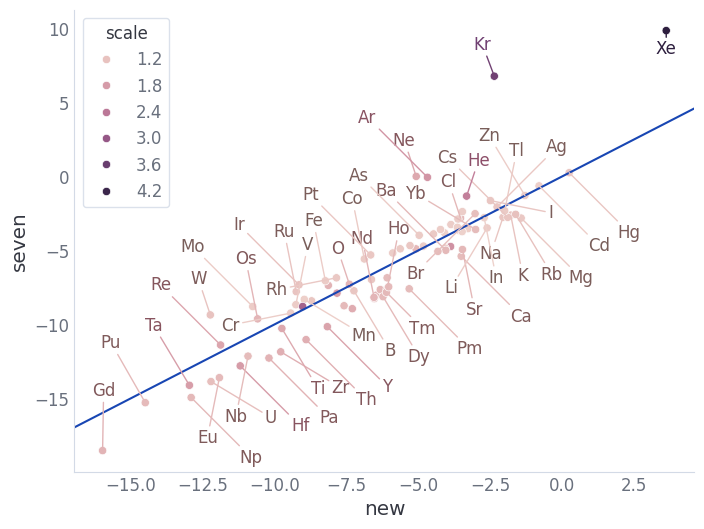

In [63]:
sns.scatterplot(energy_comp, x='new', y='seven', hue='scale')
plt.axline((0, 0), slope=1)
rp.scatter_labels(energy_comp.index)

In [64]:
from facet.utils import save_pytree


save_pytree(data, f'precomputed/{dataset}/stats.mpk')

In [65]:
from facet.utils import load_pytree


load_pytree(f'precomputed/{dataset}/stats.mpk')

{'scale': array([-1.6455648e-32,  3.7418747e-01,  4.3387148e-01,  1.2074713e-01,
         6.2019017e-02,  5.9242096e-02,  1.5171184e-01,  4.9424958e-01,
        -2.2430869e-03,  4.5955890e-01,  1.6510919e-01,  1.5244497e-01,
        -4.6431139e-02,  2.2000235e-01,  5.0168347e-01,  7.6253809e-02,
         5.7642668e-01,  5.6616824e-02,  5.0232971e-01,  4.7063580e-01,
         1.0527941e+00,  2.2590281e-01,  2.1303838e-02,  1.0618274e-01,
         1.0539119e-01,  4.0922549e-02,  7.3563677e-01,  4.7113064e-01,
         3.2916356e-02,  7.0620632e-01,  2.2872521e-01,  9.2407174e-02,
         5.9533626e-01,  2.9494191e-02,  2.2006668e-01,  4.4800431e-01,
         5.9932208e-01,  7.0523709e-01,  1.0543385e+00,  6.2769222e-01,
         5.7873130e-01,  2.8437130e-02,  1.5213022e-01,  3.5794878e-01,
         5.2261519e-01,  7.5298466e-02,  2.1950977e-01,  1.7337622e-01,
         8.6468434e-01,  2.8252265e-01,  4.4942483e-01,  5.4825310e-02,
         4.7211820e-01,  4.6541151e-01,  5.1763552e-01,

In [66]:
from facet.data.metadata import DatasetMetadata

kk = jnp.array(metadata['r_max_counts'])

ds_metadata = DatasetMetadata(
    dataset_name=dataset,
    supported_targets=('energy',),
    batches_per_group=jnp.array(metadata['batches_per_group'], dtype=jnp.uint32),
    batch_num_atoms=metadata['num_atoms'],
    nearest_k=metadata['k'],
    batch_num_graphs=metadata['num_batch'],
    shift_energy=data['global_shift'].item(),
    scale_energy=data['global_scale'].item(),
    atomic_numbers=jnp.array(metadata['atomic_numbers'], dtype=jnp.uint8),
    atomwise_scale_energy=jnp.array(data['scale']),
    atomwise_shift_energy=jnp.array(data['shift']),
    r_max_quantile_r=jnp.array(metadata['r_max_bins']),
    r_max_quantile_k=kk / kk.sum(axis=-1, keepdims=True)
)

ds_metadata

DatasetMetadata(dataset_name='mp2022', supported_targets=('energy',), batches_per_group=Array([139, 139, 139, 139, 139, 139, 183, 179, 215, 195, 207, 271, 263,
       247, 263, 239, 243, 283, 299, 299, 303, 303, 295, 295, 279, 275,
       343, 359, 379, 363, 431, 463, 563, 687, 875, 631], dtype=uint32), batch_num_atoms=14, nearest_k=32, batch_num_graphs=32, shift_energy=-5.918494701385498, scale_energy=0.8990065455436707, atomic_numbers=Array([ 0, 14, 20, 33, 51, 29, 34, 69, 50, 89, 12, 13, 49, 47, 56, 79, 62,
       30, 93, 58, 21, 80, 83, 27, 81, 32, 57, 71, 31, 90, 55, 42, 64, 48,
       16, 41, 59, 40, 72, 91, 60, 25, 46, 35, 17, 52, 78, 45, 75, 19, 61,
       24, 66, 68, 67, 73, 26, 82, 63, 28, 38, 43, 65, 94, 77, 44, 15, 11,
       22,  3, 53,  1, 76,  4, 18, 70, 37,  5, 92,  9,  7, 39, 74, 10,  6,
        8, 23,  2, 36, 54], dtype=uint8), atomwise_shift_energy=Array([  0.        ,  -0.24341719,   2.4088492 ,   0.94878715,
         1.6899228 ,   2.050212  ,   1.4475621 ,  -0.1899

In [68]:
save_pytree(ds_metadata, f'precomputed/{dataset}/metadata.mpk')

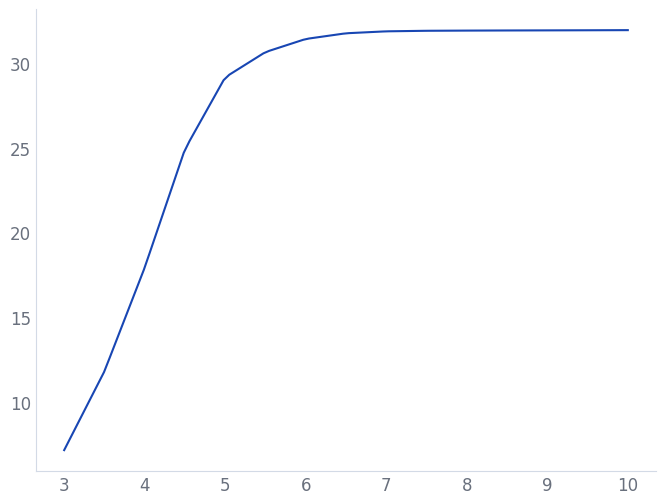

In [70]:
rr = jnp.linspace(3, 10, 100)

yy = ds_metadata.avg_num_neighbors(rr)

plt.plot(rr, yy)